In [45]:
import numpy as np
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

# Importing Dask library for big dataframes
import dask.dataframe as dd

In [209]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv')

In [33]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Id                   int64  
 1   Product_Info_1       int64  
 2   Product_Info_2       object 
 3   Product_Info_3       int64  
 4   Product_Info_4       float64
 5   Product_Info_5       int64  
 6   Product_Info_6       int64  
 7   Product_Info_7       int64  
 8   Ins_Age              float64
 9   Ht                   float64
 10  Wt                   float64
 11  BMI                  float64
 12  Employment_Info_1    float64
 13  Employment_Info_2    int64  
 14  Employment_Info_3    int64  
 15  Employment_Info_4    float64
 16  Employment_Info_5    int64  
 17  Employment_Info_6    float64
 18  InsuredInfo_1        int64  
 19  InsuredInfo_2        int64  
 20  InsuredInfo_3        int64  
 21  InsuredInfo_4        int64  
 22  InsuredInfo_5        int64  
 23  InsuredInfo_6        int64  
 24  I

In [101]:
df.head(10)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,...,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,10,1,D2,26,0.230769,3,1,1,0.507463,0.836364,0.299163,0.364887,0.325,15,1,0.0,2,1.0000,1,2,8,3,1,1,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
6,11,1,A8,10,0.166194,2,3,1,0.373134,0.581818,0.173640,0.376587,0.110,1,3,NaN,3,0.8000,1,2,3,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
7,14,1,D2,26,0.076923,2,3,1,0.611940,0.781818,0.403766,0.571612,0.120,12,1,0.0,2,1.0000,1,2,6,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,15,1,D3,26,0.230769,2,3,1,0.522388,0.618182,0.184100,0.362643,0.165,9,1,0.0,2,1.0000,1,2,3,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
9,16,1,E1,21,0.076923,2,3,1,0.552239,0.600000,0.284519,0.587796,0.025,1,3,0.0,3,0.0500,2,2,3,3,1,2,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [188]:
#Calculating the perctage of missing value droping those columns which has more than 50% of missing values 
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
drop_col = missing_data.loc[missing_data['Percent'] > 50].index
df.drop(drop_col,axis=1,inplace=True)

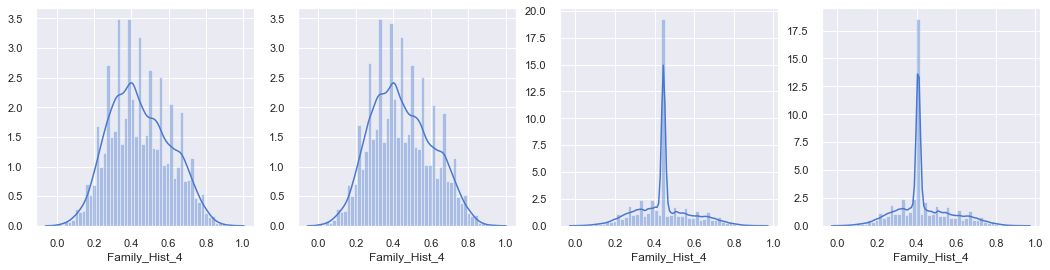

In [215]:
# Here we will try to find out the best way to fill NaN which should not manipulate data distribution.
# And we can see replace NaN with mean or mode change the distribution drastically.
# But keeping bfill will keep the graph distribution 
int_data = df["Family_Hist_4"].dropna()
mean_data = df["Family_Hist_4"].fillna(df["Family_Hist_4"].mean())
mode_data = df["Family_Hist_4"].fillna(df["Family_Hist_4"].mode()[0])
bfill_data = df["Family_Hist_4"].fillna(method='bfill').dropna()
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(18,4))

sns.distplot(int_data,ax=ax1);
sns.distplot(bfill_data,ax=ax2);
sns.distplot(mean_data,ax=ax3);
sns.distplot(mode_data,ax=ax4);


In [216]:
# Fillng the NaN with ffill and then bfill which columns has less than 50% of missing values
treating_column = missing_data.loc[(missing_data['Percent'] > 0)&(missing_data['Percent'] < 50)].index 
for i in treating_column:
    df[i] = df[i].fillna(method='ffill')
    df[i] = df[i].fillna(method='bfill')

In [ ]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(df)

In [16]:
profile.to_file("avocado_pre_profiling.html")  